In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import argparse
from create_reference_from_tsv_and_pepxml import ReferenceWriter
from sensitivity_calculator import SensitivityAndSpecificity
from create_PSM_df import PSM_FDR

In [ ]:
# Files
uniprot_nr_species_tsv_with_wrong_error = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv"
kleiner_reference_with_aradiopsis = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_reference_aradiopsis/Run1_U1_2000ng_kleiner_aradiopsis.t.xml_reduced.tsv"
uniprot_nr_reduced_tsv = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_subspecies_nr.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus_nr.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_family_nr.t.xml_reduced.tsv"
]
uniprot_reduced_tsv = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus.t.xml_reduced.tsv"
]
uniprot_species_reduced_tsv = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_species.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus_species.t.xml_reduced.tsv"
]
ncbi_reduced_tsv=[
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_subspecies.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_species.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_genus.t.xml_reduced.tsv"
]
ncbi_species_reduced_tsv = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_species_species.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_genus_species.t.xml_reduced.tsv"]
swissprot_reduced_tsv = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_species.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_genus.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_family.t.xml_reduced.tsv",
    "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_order.t.xml_reduced.tsv"
]
reference_tsv_with_kleiner_db = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_db/Run1_U1_2000ng.t.xml_reduced.tsv"



fdr = 0.05
dict_databases_to_size_and_result_file={'reference': (123088, f"{reference_tsv_with_kleiner_db}_{fdr}_sensitivity"),
                                        "reference_Arabidopsis_thaliana": (138980, f"{kleiner_reference_with_aradiopsis}_{fdr}_sensitivity"),
                                        'ncbi_subspecies': (300000, f"{ncbi_reduced_tsv[0]}_{fdr}_sensitivity"),
                                        'ncbi_species': (8702135, f"{ncbi_reduced_tsv[1]}_{fdr}_sensitivity"),
                                        "ncbi_genus":(27804893, f"{ncbi_reduced_tsv[1]}_{fdr}_sensitivity"),

                                        "uniprot_species": (4683371, f"{uniprot_reduced_tsv[0]}_{fdr}_sensitivity"),
                                        "uniprot_species_species": (2093157, f"{uniprot_species_reduced_tsv[0]}_{fdr}_sensitivity"),
                                        "uniprot_subspecies_nr": (200000, f"{uniprot_nr_reduced_tsv[0]}_{fdr}_sensitivity"),
                                        "uniprot_species_nr": (2991727, f"{uniprot_nr_reduced_tsv[1]}_{fdr}_sensitivity"),
                                        "uniprot_genus": (18352148,  f"{uniprot_reduced_tsv[1]}_{fdr}_sensitivity"),
                                        "uniprot_genus_species": (13068285,  f"{uniprot_species_reduced_tsv[1]}_{fdr}_sensitivity"),
                                        "uniprot_genus_nr": (13210287,  f"{uniprot_nr_reduced_tsv[2]}_{fdr}_sensitivity"),
                                        "uniprot_family_nr": (22509624, f"{uniprot_nr_reduced_tsv[3]}_{fdr}_sensitivity"),
                                        
                                        "swissprot_species": (58505, f"{swissprot_reduced_tsv[0]}_{fdr}_sensitivity"),
                                        "swissprot_genus": (88164, f"{swissprot_reduced_tsv[1]}_{fdr}_sensitivity" ),
                                        "swissprot_family": (124044, f"{swissprot_reduced_tsv[2]}_{fdr}_sensitivity"),
                                        "swissprot_order": (181725, f"{swissprot_reduced_tsv[3]}_{fdr}_sensitivity")}
uniprot_dict =dict(filter(lambda item: 'uniprot' in item[0], dict_databases_to_size_and_result_file.items()))
uniprot_nr_dict =dict(filter(lambda item: '_nr' in item[0], uniprot_dict.items()))
uniprot_species_dict=dict(filter(lambda item: item[0] in ['uniprot_species_species', 'uniprot_genus_species'], uniprot_dict.items()))
ncbi_dict =dict(filter(lambda item: 'ncbi' in item[0], dict_databases_to_size_and_result_file.items()))
swissprot_dict=dict(filter(lambda item: 'swiss' in item[0], dict_databases_to_size_and_result_file.items()))

In [ ]:
def read_all_results_into_dict(file):
    result_dict= {}
    with open(file, 'r') as inp:
        firstline=inp.readline()
        db_names = [name.strip() for name in firstline.strip().split('\t')[1:]]
        for db in db_names:
            result_dict[db] = {}
        for line in inp.readlines():
            result_name = line.split('\t')[0]
            result_fields = [name.strip() for name in line.split('\t')[1:]]
            for i, db in enumerate(db_names):
                result_dict[db][result_name]=result_fields[i]
    return result_dict

def read_analysis_results_into_dict(file):
    result_dict= {}
    with open(file, 'r') as inp:
        for line in inp.readlines():
            result_dict[line.split('\t')[0]] = line.split('\t')[1].strip()
   #print(result_dict)
    return result_dict

def read_TP(file):
    TP = int(read_analysis_results_into_dict(file)['TP:'])
    return TP

def read_TN(file):
    TN = int(read_analysis_results_into_dict(file)['TN:'])
    return TN

def read_FP(file):
    TP = int(read_analysis_results_into_dict(file)['FP:'])
    return TP

def read_FN(file):
    TN = int(read_analysis_results_into_dict(file)['FN:'])
    return TN

def read_sensitivity(file):
    sen = float(read_analysis_results_into_dict(file)['sensitivity:'])
    return sen
 
def read_specificity(file):
    spe = float(read_analysis_results_into_dict(file)['specificity:'])
    return spe

def read_last_score(file):
    last_score = read_analysis_results_into_dict(file)['Hyperscore of last item in FDR boundaries:']
    return last_score

In [ ]:
def get_score_results(filtered_dict):   
    db_size = []
    score_border = []
    result_dict = {}
    for file_name, db_size_file_tuple in filtered_dict.items():
        result_dict[file_name] = {'db_size': db_size_file_tuple[0]/100000, 'score_border': read_last_score(db_size_file_tuple[1])}

    for k, v in result_dict.items():
        db_size.append(v['db_size'])
        score_border.append(v['score_border'])
    return result_dict, db_size, score_border

def get_specificity_results(filtered_dict):   
    db_size = []
    score_border = []
    result_dict = {}
    for file_name, db_size_file_tuple in filtered_dict.items():
        result_dict[file_name] = {'db_size': db_size_file_tuple[0]/100000, 'specificity': read_specificity(db_size_file_tuple[1])}
    for k, v in result_dict.items():
        db_size.append(v['db_size'])
        score_border.append(v['specificity'])
    return result_dict, db_size, score_border

In [ ]:
def get_decoy_rows_from_decoy_column(decoy_column):
    return [True if d=={True} else False for d in decoy_column]

def get_tax_rows(tax_column, taxid):
    return [True if tax_set == {taxid} else False for tax_set in tax_column]

def get_decoy_rows_from_protein_column(protein_column):
    return [True if 'REVERSED' in p else False for p in protein_column]


def get_hit_rows(protein_column):
    return [False if 'REVERSED' in p else True for p in protein_column]

def get_decoy_rows2(decoy_column):
    return [True if d_set in [{True, False}, {True}] else False for d_set in decoy_column]

def get_hit_rows2(decoy_column):
    return [True if d_set in  [{True, False}, {False}] else False for d_set in decoy_column]

In [ ]:
def read_result_df(f):
    df =  ReferenceWriter.read_csv_with_generic_function(f,['Hyperscore', 'taxID', 'decoy'])
    return df[['Title', 'Peptide', 'Hyperscore', 'taxID', 'decoy']]
def get_psm_and_df_in_fdr(reduced_df, fdr):
    fdr_pos_result, number_psm_result, number_decoy_result, double_spectra_result, score_last_item_result =PSM_FDR.determine_FDR_position(reduced_df, fdr, True)
    return number_psm_result, reduced_df[0:fdr_pos_result]

In [ ]:
# load ref file
kleiner_pep_xml_result = pd.read_csv('/home/jules/Documents/Tax2Proteome/benchmarking/spectra/Run1_U1_2000ng.pep.xml.tsv', sep='\t')
kleiner_pep_xml_result = kleiner_pep_xml_result.rename(columns={'Peptide': 'Peptide_ref'})
kleiner_pep_xml_result_reduced_df = kleiner_pep_xml_result.groupby(["Title", "Ref_Score"], as_index=False).agg(
            {'ProteinAcc': lambda acc: set(acc), 'Peptide_ref': lambda seq: set(seq)})

In [ ]:
# load files into df
#read complete tsv. for 'Protein', 'Hyperscore', 'decoy' use function for reading (get set(int) instead oof strings)
uniprot_reduced_tsv_subspecies_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv[0],['Protein', 'Hyperscore', 'decoy', 'taxID'])
uniprot_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv[1],['Protein', 'Hyperscore', 'decoy', 'taxID'])
uniprot_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv[2],['Protein', 'Hyperscore', 'decoy', 'taxID'])
uniprot_reduced_tsv_family_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv[3],['Protein', 'Hyperscore', 'decoy', 'taxID'])

In [ ]:
swissprot_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv[0],['Protein', 'Hyperscore', 'decoy', 'taxID'])
swissprot_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv[1],['Protein', 'Hyperscore', 'decoy', 'taxID'])
swissprot_reduced_tsv_family_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv[2],['Protein', 'Hyperscore', 'decoy', 'taxID'])
swissprot_reduced_tsv_order_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv[3],['Protein', 'Hyperscore', 'decoy', 'taxID'])


In [ ]:
ncbi_reduced_tsv_subspecies_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv[0],['Protein', 'Hyperscore', 'decoy', 'taxID'])
ncbi_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv[1],['Protein', 'Hyperscore', 'decoy', 'taxID'])
ncbi_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv[2],['Protein', 'Hyperscore', 'decoy', 'taxID'])

# ReferenceWriter.read_csv_with_generic_function(uniprot_nr_species_tsv_with_wrong_error,['Protein', 'Hyperscore', 'decoy'])

In [ ]:
# Histogramm
def create_df_for_df_with_sep_decoy(df_reduced_tsv):
    """
    decoy column values of reduced_tsv file changed to 'PSM' for  {False} and 'DECOY' for {TRUE}
    {True, False} values doubled, one as 'PSM' one as 'DECOY'
    :return:  Title(=spectrum ID) | Protein set {acc1, acc2} | Hyperscore (float) | decoy (PSM or DECOY)
    """
    def get_true_false(decoy_column):
        l = [True if decoy == {True, False} else False for decoy in decoy_column]
        return l
    # reduce df to columns 'Title', 'Protein', 'Hyperscore', 'decoy'
    df_reduced_tsv = df_reduced_tsv[['Title', 'Protein', 'Hyperscore', 'decoy']]
    # df only with rows with value {True, False} in column "decoy"
    df_true_false = df_reduced_tsv[get_true_false(df_reduced_tsv.decoy)]
    # df only with rows with value {True, False} in column "decoy"  copyied
    df_true = df_true_false.copy(deep=True)
    # df value {True, False} in column "decoy" changed to {True}
    df_true.decoy=[{True} for v in df_true.decoy]
    # copied original df with columns 'Title', 'Protein', 'Hyperscore', 'decoy'
    df_with_sep_decoy= df_reduced_tsv.copy(deep=True)
    # decoy column value {False, True} changed to False
    df_with_sep_decoy.decoy = [{False} if v == {False, True} else v for v in df_with_sep_decoy.decoy ]
    # df_true rows appended, so decoy entries with {False True} doubled, one with {true}, once with {False}}
    df_with_sep_decoy = df_with_sep_decoy.append(df_true, ignore_index=True)
    # replace decoy value {True} by DECOY {False} by 'PSM'
    df_with_sep_decoy.decoy=['DECOY' if v == {True} else 'PSM' for v in df_with_sep_decoy.decoy]
    return df_with_sep_decoy

def create_all_level_df_for_histogram_per_db(df_reduced_tsv_list, db_level):
    df_list = []
    for i, df_reduced_tsv in enumerate(df_reduced_tsv_list):
        df_level = create_df_for_df_with_sep_decoy(df_reduced_tsv)
        df_level['level'] = db_level[i]
        df_list.append(df_level)      
    df_all_level = pd.concat(df_list)
    return df_all_level

def get_all_fdr_borders_per_db(db_dict, db_names):
    border_list = []
    for name in (db_names):
        fdr_border_level = float(read_last_score(db_dict[name][1]))
        border_list.append(fdr_border_level)
    return border_list
            
def create_histograms_in_columns_per_db(df_all_level, border_list, output):
    sns.set_style("whitegrid", {'axes.grid' : False})
    g1 = sns.displot(data=df_all_level, col='level', x="Hyperscore", hue="decoy", binwidth=1.5, palette=['lightblue', 'red'], legend=False)
    #kde=True : curve insert above hist
    axes_subplots = g1.fig.axes
    for i, fdr_border in enumerate(border_list):
        subplot_axe = axes_subplots[i]
        subplot_axe.axvline(fdr_border, linewidth=2, color='black', label='FDR')
        y_min, y_max = subplot_axe.get_ylim()
        subplot_axe.text(fdr_border+1, y_max-(y_max/10), str(fdr_border), va='bottom')
    plt.legend(title='', loc='upper right', labels=['0.05 FDR','DECOY', 'PSM'])
    plt.savefig(output, format='svg')

In [ ]:
# create df for histogramm, get fdr_borders
df_uniprot = create_all_level_df_for_histogram_per_db([uniprot_reduced_tsv_species_df, uniprot_reduced_tsv_genus_df,
                                                       uniprot_reduced_tsv_family_df], ['species', 'genus', 'family'])
border_list_uniprot = get_all_fdr_borders_per_db(uniprot_nr_dict, ['uniprot_species_nr', 'uniprot_genus_nr', 'uniprot_family_nr'])

In [ ]:
df_ncbi = create_all_level_df_for_histogram_per_db([ncbi_reduced_tsv_species_df, ncbi_reduced_tsv_genus_df], ['species', 'genus'])
border_list_ncbi = get_all_fdr_borders_per_db(ncbi_dict, ['ncbi_species', 'ncbi_genus'])

In [ ]:
df_swissprot = create_all_level_df_for_histogram_per_db([swissprot_reduced_tsv_species_df, swissprot_reduced_tsv_genus_df,
                                                       swissprot_reduced_tsv_family_df, swissprot_reduced_tsv_genus_df], ['species', 'genus', 'family', 'order'])
border_list_swissprot = get_all_fdr_borders_per_db(swissprot_dict, ['swissprot_species', 'swissprot_genus', 'swissprot_family', 'swissprot_order'])

In [ ]:
# plot and save histogramm
output = f'/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_uniprot.svg'
create_histograms_in_columns_per_db(df_uniprot, border_list_uniprot, output)

In [ ]:
output = f'/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_ncbi.svg'
create_histograms_in_columns_per_db(df_ncbi, border_list_ncbi, output)

In [ ]:
output = f'/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_swissprot.svg'
create_histograms_in_columns_per_db(df_swissprot, border_list_swissprot, output)

In [ ]:
# ROC
fdrs = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
files = [f'/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv_{fdr}_sensitivity'
        for fdr in fdrs]

files_ignore_unclassified = [f'/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv_ignore_unclassified_{fdr}_sensitivity' 
                            for fdr in fdrs]
used_files=files_ignore_unclassified
TP_values = [read_TP(file) for file in used_files]
FN_values = [read_FN(file) for file in used_files]
FP_values = [read_FP(file) for file in used_files]
TN_values = [read_TN(file) for file in used_files]
#fpr = fp/(fp+tn)
fpr_values = [FP_values[i]/(FP_values[i]+TN_values[i]) for i in range(len(used_files))]
#tpr = tp/(tp+fn) = sensitivity
tpr_values =  [TP_values[i]/(TP_values[i]+FN_values[i]) for i in range(len(used_files))]
m = max(tpr_values)
maxes = [i for i, j in enumerate(tpr_values) if j == m]
print('tpr max:', [fdrs[i] for i in maxes])
#print(tpr_values)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
#ax.plot(np.linspace(0, 1, 100),
 #        np.linspace(0, 1, 100),
  #       label='baseline',
   #      linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
#plt.legend(fontsize=12);

In [ ]:
uni_spec_in_fdr = get_df_in_fdr(uniprot_reduced_tsv_species_df, 0.1)
# kleiner_pep_xml_result:  Title ProteinAcc  Peptide  Ref_Score
# uni_spec_in_fdr: reduced_df of uniprot species matches in FDR-border: Title Peptide  Hyperscore taxID  decoy 
print('number of identified spectra by Kleiner: ', len(set(kleiner_pep_xml_result['Title'].tolist())))
print('number of identified spectra by Uniprot species: ', len(set(uni_spec_in_fdr['Title'].tolist())))
# Title  Ref_Score  ProteinAcc Peptide_x (set)  Peptide_y(string)  Hyperscore   taxID    decoy
merged_pep_xml_uniprot_df = pd.merge(kleiner_pep_xml_result_reduced_df, uni_spec_in_fdr, how="outer", left_on='Title', right_on="Title")
df_identified_in_uniprot = merged_pep_xml_uniprot_df[merged_pep_xml_uniprot_df['Peptide_ref'].isna()]
df_identified_in_kleiner_ref = merged_pep_xml_uniprot_df[merged_pep_xml_uniprot_df['Peptide'].isna()]
print('number of spectra identified in uniprot species result but not in kleiner: ', len(set(df_identified_in_uniprot['Title'].tolist())))
print('number of spectra identified in kleiner but not in uniprot species result: ', len(set(df_identified_in_kleiner_ref['Title'].tolist())))

In [ ]:
86317-48772+7070


In [ ]:
# with spectra, which do not pass quality control of xtandem in 2.run
error_reduced_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_species_tsv_with_wrong_error,['Protein', 'Hyperscore', 'decoy'])

In [ ]:
uni_error_in_fdr = get_df_in_fdr(error_reduced_df, 0.1)
uni_error_in_fdr = uni_error_in_fdr.rename(columns={'Peptide': 'Peptide_er'})
merged_pep_xml_uniprot_df_er = pd.merge(kleiner_pep_xml_result_reduced_df, uni_error_in_fdr, how="outer", left_on='Title', right_on="Title")
df_identified_in_uniprot_er = merged_pep_xml_uniprot_df_er[merged_pep_xml_uniprot_df_er['Peptide_ref'].isna()]
df_identified_in_kleiner_ref_er = merged_pep_xml_uniprot_df_er[merged_pep_xml_uniprot_df_er['Peptide_er'].isna()]
print('number of identified spectra by Uniprot species with error: ', len(set(uni_error_in_fdr['Title'].tolist())))
print('number of spectra identified in uniprot species with error result but not in kleiner: ', len(set(df_identified_in_uniprot_er['Title'].tolist())))
print('number of spectra identified in kleiner but not in uniprot species result: ', len(set(df_identified_in_kleiner_ref_er['Title'].tolist())))

In [ ]:
uni_spec_in_fdr = uni_spec_in_fdr.rename(columns={'Peptide': 'Peptide_uni'})
merged_pep_xml_uniprot_df = pd.merge(kleiner_pep_xml_result_reduced_df, uni_spec_in_fdr, how="outer", on="Title")
a = pd.merge(merged_pep_xml_uniprot_df_er, merged_pep_xml_uniprot_df, how="outer", on='Title')
b = a[a['Peptide_uni'].isna()][['Title', 'Peptide_ref_x', 'Peptide_ref_y', 'Peptide_uni', 'Peptide_er']]
c = b[b['Peptide_er'].notna()]
d = c[c['Peptide_ref_x'].notna()]
# without quality control: 8 specta more identified (equal to kleiner_ref), all other trash

In [ ]:
# database size
db_size_files = ["/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_kleiner_noRH",
       "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_kleiner",
       "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_tanca",
       "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_tanca_noRH"]
sns.set_style("white") 
#or whitegrid?
#xlabels = ['axes.axisbelow':False]

for i, file in enumerate(db_size_files):
    DatabaseSize = pd.read_csv(file+".txt", sep='\t')
    if 'kleiner' in file:
        title = '29MM'
    elif 'tanca' in file:
        title = '9MM'
    if 'noRH' in file:
        g = sns.catplot(x='level', y='# fasta', hue='database', linestyles=["-", "-", "-", "-"],
            kind="point", palette=['blue','red','orange','purple'], data=DatabaseSize)  
        plt.ylim([0,(50000000)])
    else:    
        g = sns.catplot(x='level', y='size (GB)', hue='database', linestyles=["-", "-", "-","-", "-"],
            kind="point", palette=['blue','dodgerblue','red','orange','purple'], data=DatabaseSize)
        plt.ylim([0,43])
    g.fig.suptitle(title)
    g.savefig(f"/home/jules/Documents/Tax2Proteome/benchmarking/plots/database_size/{Path(file +'.txt').stem}.svg", format='svg')

In [ ]:
# database-size vs. PSMs
def get_psm_per_db(db, fdr):
    PSM_identified = []
    if db == 'uniprot':
        files = [uniprot_reduced_tsv_subspecies_df, uniprot_reduced_tsv_species_df, uniprot_reduced_tsv_genus_df,
                 uniprot_reduced_tsv_family_df]
    if db == 'ncbi':
        files = [ncbi_reduced_tsv_subspecies_df, ncbi_reduced_tsv_species_df, ncbi_reduced_tsv_genus_df]
    if db == 'swissprot':
        files = [swissprot_reduced_tsv_species_df, swissprot_reduced_tsv_genus_df,
                 swissprot_reduced_tsv_family_df, swissprot_reduced_tsv_order_df]
    for file in files:
        psm, df = get_psm_and_df_in_fdr(file, fdr)
        PSM_identified.append(psm)
    return PSM_identified

def create_pd_df_for_psm_plot(PSM_identified_uniprot_percentage, PSM_identified_ncbi_percentage, uniprot_database_sizes, ncbi_database_sizes, PSM_identified_swissprot_percentage=None, swissprot_database_sizes=None):
    database = ['UniProtKB_NR' for e in PSM_identified_uniprot_percentage]
    database.extend(['NCBI' for e in PSM_identified_ncbi_percentage])
    if PSM_identified_swissprot_percentage:
        database.extend(['Swissprot' for e in PSM_identified_swissprot_percentage])
    psms = PSM_identified_uniprot_percentage + PSM_identified_ncbi_percentage 
    if PSM_identified_swissprot_percentage:
        psms = psms + PSM_identified_swissprot_percentage
    dataset = ['kleiner' for e in  database]
    level = ['subspecies', 'species', 'genus', 'family', 'subspecies', 'species', 'genus']
    if PSM_identified_swissprot_percentage:
        level = level + ['species', 'genus', 'family', 'order']

    database_size = uniprot_database_sizes + ncbi_database_sizes
    if swissprot_database_sizes:
        database_size = database_size + swissprot_database_sizes
    DatabaseSize = pd.DataFrame(list(zip(database_size, level, psms, database, dataset)), columns =['# fasta (M)', 'level', '% PSMs identified', 'database', 'dataset'])
    return DatabaseSize

In [ ]:
# database-size vs. PSMs
number_of_spectra = 164414
PSM_identified_uniprot = get_psm_per_db('uniprot', 0.1)
PSM_identified_ncbi = get_psm_per_db('ncbi', 0.1)
PSM_identified_swissprot = get_psm_per_db('swissprot', 0.1)
PSM_identified_ncbi_percentage = [psm/number_of_spectra * 100 for psm in PSM_identified_ncbi]
PSM_identified_uniprot_percentage= [psm/number_of_spectra * 100 for psm in PSM_identified_uniprot]
PSM_identified_swissprot_percentage= [psm/number_of_spectra * 100 for psm in PSM_identified_swissprot]
uniprot_database_sizes = [uniprot_nr_db[0]/1000000 for uniprot_nr_db in uniprot_nr_dict.values()]
ncbi_database_sizes = [ncbi_db[0]/1000000 for ncbi_db in ncbi_dict.values()]
swissprot_database_sizes = [swissprot_db[0]/1000000 for swissprot_db in swissprot_dict.values()]

df_for_plot_all_db = create_pd_df_for_psm_plot(PSM_identified_uniprot_percentage, PSM_identified_ncbi_percentage, uniprot_database_sizes, ncbi_database_sizes, PSM_identified_swissprot_percentage, swissprot_database_sizes)

In [ ]:
# database-size vs. PSMs Plots
# identified PSMs deutlich abweichend von Bachelor-Analyse
sns.set_style("white") 
def create_fasta_size_vs_identifed_psms_plot(DatabaseSize, output):
    plt.clf()
    if set(DatabaseSize['dataset']) == {'kleiner'}:
        title = '29MM'
        #plt.ylim([0,30])
    elif set(DatabaseSize['dataset']) == {'tanca'}:
        title = '9MM'
        #plt.ylim([50,100])
    g = sns.scatterplot(x='# fasta (M)', y='% PSMs identified', style ='level', hue='database', palette=['red','blue'], linestyles=["-", "-"], data=DatabaseSize) 
    sns.lineplot(x='# fasta (M)', y='% PSMs identified', hue='database', legend=False, palette=['red','blue'], data=DatabaseSize) 
    g.set_title(title)
    plt.tight_layout()
    plt.savefig(output, format='svg')
    
df_for_plot = create_pd_df_for_psm_plot(PSM_identified_uniprot_percentage, PSM_identified_ncbi_percentage, uniprot_database_sizes, ncbi_database_sizes)
create_fasta_size_vs_identifed_psms_plot(df_for_plot, "/home/jules/Documents/Tax2Proteome/benchmarking/plots/database_size/uni_ncbi_db_psm_vs_db_size.svg")

In [ ]:
PSM_identified_swiss = get_psm_per_db('swissprot', 0.1)
[psm/number_of_spectra * 100 for psm in PSM_identified_swiss]

In [ ]:
#PSMs 
outputfiles = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/plots/PSM/kleiner_psm_vs_level.svg",
    "/home/jules/Documents/Tax2Proteome/benchmarking/plots/PSM/tanca_psm_vs_level.svg"
]

def create_database_level_vs_identified_plot(df_for_plot, dataset, output):
    title=''
    plt.clf()
    if dataset == 'tanca':
        title= '9MM'
        plt.ylim([0,100])
    elif dataset == 'kleiner':
        title= '29MM'
        plt.ylim([0,30])
    number = len(set(list(PSM['Database level'])))
    g = sns.barplot(x="level", y="% PSMs identified", hue='database', palette=sns.color_palette("GnBu", 3), data=df_for_plot)
    handles, labels = g.get_legend_handles_labels()
    g.legend(loc='lower center', bbox_to_anchor=(1.2, 0.3))
    #g.get_legend().set_visible(False)
    for tick in g.get_xticklabels():
        tick.set_rotation(0)       
    g.set_title(title)
    plt.tight_layout()
    plt.savefig(output, format='svg')
create_database_level_vs_identified_plot(df_for_plot_all_db, 'kleiner', outputfiles[0])

In [ ]:
def get_decoy_rows_from_decoy_column_from_merged_df(decoy_column):
    result=[]
    for d in decoy_column:
        if type(d) != set:
            result.append(True)
        elif  d=={True}:
            result.append(True)
        else:
            result.append(False)
    return result

In [ ]:
# identified spectra in all levels together: 36,84%, deutlich abweichender Wert von Bachelorarbeit 26%:
l = [uniprot_reduced_tsv_subspecies_df, uniprot_reduced_tsv_species_df, uniprot_reduced_tsv_genus_df, uniprot_reduced_tsv_family_df]
fdr = 0.1
psm, uniprot_reduced_tsv_subspecies_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
psm,uniprot_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
psm,uniprot_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)
psm, uniprot_reduced_tsv_family_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_family_df, fdr)

subspecies_df_in_fdr = uniprot_reduced_tsv_subspecies_df_in_fdr.rename(columns={'decoy': 'decoy_subspecies'})
species_df_in_fdr = uniprot_reduced_tsv_species_df_in_fdr.rename(columns={'decoy': 'decoy_species'})
genus_df_in_fdr = uniprot_reduced_tsv_genus_df_in_fdr.rename(columns={'decoy': 'decoy_genus'})
family_df_in_fdr = uniprot_reduced_tsv_family_df_in_fdr.rename(columns={'decoy': 'decoy_family'})
a = pd.merge(subspecies_df_in_fdr, species_df_in_fdr, how="outer", on='Title')
b = pd.merge(a, genus_df_in_fdr, how="outer", on='Title')
c = pd.merge(b, family_df_in_fdr, how="outer", on='Title')
decoy_subp, decoy_sp, decoy_gen, decoy_fam = get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_subspecies), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_species), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_genus), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_family)
decoy_list= []
for decoy_sub, decoy_s, decoy_ge, decoy_fa in zip(decoy_subp, decoy_sp, decoy_gen, decoy_fam):
    if False in (decoy_sub, decoy_s, decoy_ge, decoy_fa):
        decoy_list.append(True)
    else:
        decoy_list.append(False)
identified_spectra_of_all_levels_together = len(set(c[decoy_list]['Title']))
identified_spectra_of_all_levels_together/number_of_spectra*100
print(identified_spectra_of_all_levels_together/number_of_spectra*100)
path = "/home/jules/Documents/Tax2Proteome/benchmarking/plots/uniprot_all_level_merged.tsv"
c[decoy_list][['Title', 'decoy_subspecies', 'decoy_species', 'decoy_genus', 'decoy_family']].to_csv(path, sep='\t')

In [ ]:
def count_spectra_per_taxon(reduced_df_in_fdr, level, taxon=None, taxa_list=None):
    spectra = set()
    for spectrum_ID, taxa_set in zip(list(reduced_df_in_fdr['Title']), list(reduced_df_in_fdr[f'taxID_{level}'])):
        if taxon:
            if taxon in taxa_set:
                spectra.add(spectrum_ID)
        elif taxa_list:
            for taxon in taxa_list:
                if taxon in taxa_set:
                    spectra.add(spectrum_ID)
    return (spectra)

In [ ]:
fdr = 0.01
psm, uniprot_reduced_tsv_subspecies_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
psm, uniprot_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
psm, uniprot_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)
psm, uniprot_reduced_tsv_family_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_family_df, fdr)

In [46]:
taxon_graph = HelperMethod.load_taxa_graph(Path("/home/jules/Documents/databases/databases_tax2proteome/taxdump.tar.gz"))

def count_all_taxa(reduced_df_in_fdr, level):
    kleiner_taxIDs_without_virus = [536, 882, 44577, 228410, 323848, 46170, 93061, 224308, 99287, 511145, 176299, 216596, 1041145,
                                    262724, 266264, 266265, 1004788, 1114970, 1149133, 1294143, 1407502, 3055, 1302247, 926571]
    kleiner_virus_taxIDs = [10754, 101570, 1985310, 329852, 1283336, 12022, 1977402]
    kleiner_taxIDs_without_virus_level = set(flatten_list(taxon_graph.get_all_taxids(kleiner_taxIDs_without_virus, level)))
    kleiner_virus_taxIDs_level = set(flatten_list(taxon_graph.get_all_taxids(kleiner_virus_taxIDs, level)))
    result_spectra_dict = {}
    for taxon in kleiner_taxIDs_without_virus_level:
        result_spectra_dict[str(taxon)]=count_spectra_per_taxon(reduced_df_in_fdr, level taxon)
    result_spectra_dict['virus']=count_spectra_per_taxon(reduced_df_in_fdr, level, taxa_list=kleiner_virus_taxIDs)
    return result_spectra_dict

for uniprot_df in [uniprot_reduced_tsv_subspecies_df_in_fdr, uniprot_reduced_tsv_species_df_in_fdr, uniprot_reduced_tsv_genus_df_in_fdr, uniprot_reduced_tsv_family_df_in_fdr]:
    nb_all_identified_spectra_for_uniprot.append(len(set(uniprot_df['Title'])))
    
def get_percentage_psm_per_taxon(level, taxon):
    final_taxa_set= set()
    for taxon in taxon.split(', '):
        final_taxa_set=final_taxa_set.union(all_counts_for_uniprot[level][taxon])
    psm_percentage = len(final_taxa_set)/nb_all_identified_spectra_for_uniprot[i]*100
    return psm_percentage

In [ ]:
all_counts_for_uniprot = {}
nb_all_identified_spectra_for_uniprot = []
for level, uniprot_df in zip(['strain', 'species', 'genus', 'family'],[uniprot_reduced_tsv_subspecies_df_in_fdr, uniprot_reduced_tsv_species_df_in_fdr, uniprot_reduced_tsv_genus_df_in_fdr, uniprot_reduced_tsv_family_df_in_fdr]):
    all_counts_for_uniprot[level]=count_all_taxa(uniprot_df)

           taxon(s)      % PSM  % protein  % database
0             virus   0.004954   0.521797    0.035957
1            926571   0.252675   0.832626    0.066597
2           1302247   0.947946   0.937143    0.176048
3              3055   1.015656   4.061252    0.667169
4           1407502   9.246598   8.151026    4.107234
5           1294143   3.302946   2.917719    0.147650
6           1149133   2.691901   1.184081    0.121985
7           1114970   8.633901   6.804852    7.728151
8           1004788   1.398798   0.969786    0.448459
9            266265   1.577157   0.440528    0.183842
10           266264  13.258026  15.770794    0.423861
11           262724   0.716739   1.707488    0.313300
12  216596, 1041145   3.393777   3.223383    4.657948
13           176299   4.921390   5.738466    0.531626
14           511145  18.702933   5.881391   38.236241
15            99287  22.854736  34.321285   35.869185
16           224308   1.298058   0.800302    1.858512
17     46170, 93061   1.3954

KeyError: 'viruses'

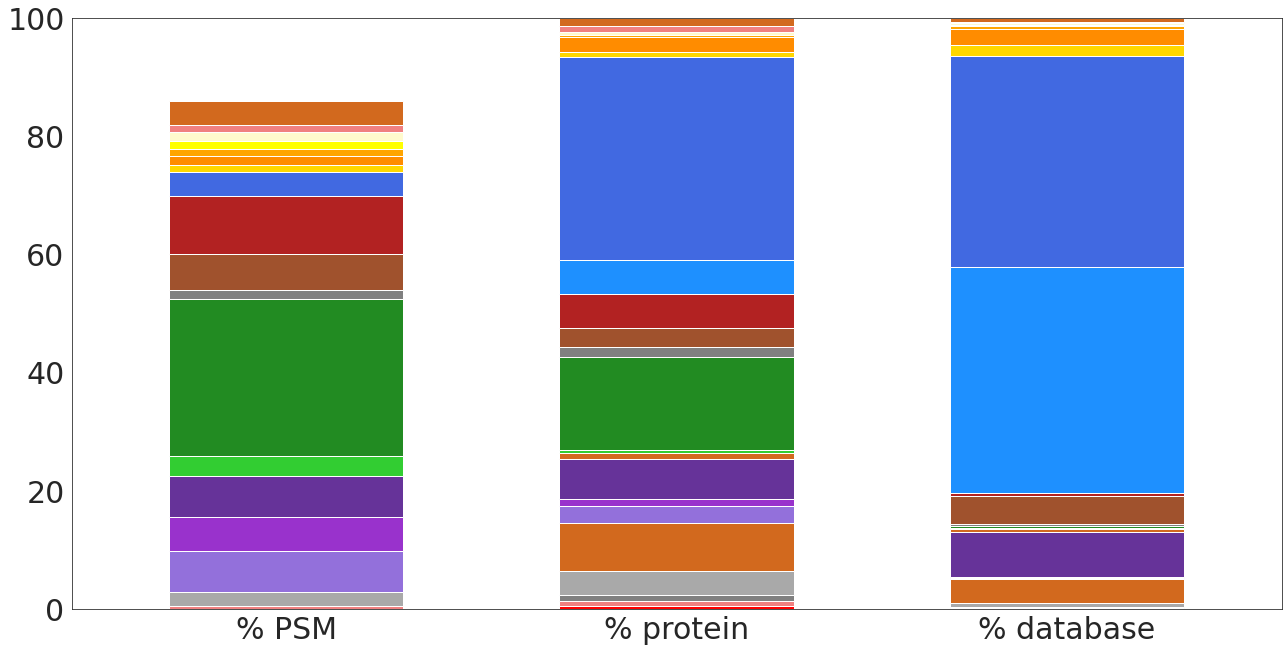

In [47]:


input_files = [
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_species",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_genus",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_family",
    
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_species",  
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_genus_species",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_genus",
    
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_strain",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_strain_names",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_species",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_species_names",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_genus",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_genus_names",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_family",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_family_names",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_order",
    "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_order_names"
]

outputpath = "/home/jules/Documents/Tax2Proteome/benchmarking/plots/taxon_specific_identification/new/"
sns.set_style("white")
# kleiner_palette_strain = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'mediumpurple','darkorchid','rebeccapurple',   'chocolate', 'limegreen', 'forestgreen', 'grey', 'sienna', 'chocolate', 'firebrick',  'dodgerblue', 'royalblue', 'gold', 'darkorange', 'orange', 'yellow', 'khaki', 'lemonchiffon', 'lightcoral', 'chocolate']
kleiner_palette_species = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'mediumpurple','darkorchid','rebeccapurple', 'chocolate', 'limegreen', 'forestgreen', 'grey', 'sienna', 'firebrick',  'dodgerblue', 'royalblue', 'gold', 'darkorange', 'orange', 'yellow', 'lemonchiffon', 'lightcoral', 'chocolate']
kleiner_palette_genus = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'rebeccapurple', 'chocolate', 'limegreen', 'forestgreen', 'grey', 'sienna', 'firebrick',  'dodgerblue', 'royalblue', 'gold', 'darkorange', 'orange', 'yellow', 'lemonchiffon', 'lightcoral', 'chocolate']
kleiner_palette_family = [ 'red', 'lightcoral', 'grey','darkgrey', 'chocolate', 'rebeccapurple', 'chocolate',  'forestgreen', 'grey', 'firebrick',  'royalblue', 'gold', 'darkorange',  'lemonchiffon', 'lightcoral', 'chocolate']
kleiner_palette_order = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'rebeccapurple', 'chocolate',  'forestgreen', 'grey', 'firebrick',  'royalblue', 'darkorange', 'lemonchiffon', 'lightcoral', 'chocolate']

for i, file in enumerate(input_files[0:3]):
    df = pd.read_csv(file+".txt", sep='\t')
    print(df)
   # taxon_to_db_percentage = {t:db for t, db in zip(list(df['taxon(s)']), list(df['% database']))}
    df['% PSM'] = df.apply(lambda row: get_percentage_psm_per_taxon(input_files.split('db_')[1], row['taxon(s)']), axis=1)
    print(df)
    if 'strain' in file:
        palette=kleiner_palette_strain
        level='subspecies'
    elif 'species' in file and not 'genus' in file:
        palette=kleiner_palette_species
        level='species'
    elif 'genus' in file:
        palette=kleiner_palette_genus
        level='genus'
    elif 'family' in file:
        palette=kleiner_palette_family
        level='family'
    elif 'order' in file:
        palette=kleiner_palette_order
        level='order'
    if 'ncbidb' in file:
        db = 'NCBI'
    elif 'unidb' in file:
        db = 'Uniprot'
    elif 'swissprot' in file:
        db = 'Swissprot'
           
    sns.set_palette(sns.color_palette(palette))
    ax = df.set_index('taxon(s)').reindex(df.set_index('taxon(s)').sum().index, axis=1).T.plot(kind='bar', stacked=True, width=0.6,
          figsize=(18,9), fontsize=30)
    # ,title=("Species:Kleiner\ndatabase: %s   level: %s" %(db, level))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='lower center', bbox_to_anchor=(1.3, 0.1))
    ax.get_legend().set_visible(False)
    #ax.set_xticklabels("")
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
    plt.tight_layout()
    plt.ylim([0,100])
    fig = plt.gcf()
    fig.savefig(Path(outputpath)/(str(Path(file).stem)+".svg"), format='svg')

In [61]:
t_set = (uniprot_reduced_tsv_species_df_in_fdr['taxID'].tolist()[0])
print(59203 in t_set)
print('59201' in t_set)
print(uniprot_reduced_tsv_species_df_in_fdr['taxID'])

True
False
0        {59201, 59203, 2583588, 59205, 83333, 28901, 1...
1                                                 {119219}
2                                                 {119219}
3        {59201, 59203, 2583588, 59205, 83333, 28901, 1...
4                                         {266264, 119219}
                               ...                        
34934    {59201, 149539, 59203, 28901, 83333, 1432560, ...
34935                                             {119219}
34936    {90370, 90371, 83333, 115981, 1962639, 656410,...
34937                                        {266, 318586}
34938                                              {40324}
Name: taxID, Length: 34939, dtype: object


In [ ]:
print(1302247 in uniprot_reduced_tsv_species_df_in_fdr['taxID'])